In [29]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l

n_train, n_test = 20, 100
num_inputs = 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.mm(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train, :], labels[n_train:, :]

In [31]:
def init_param():
    w = torch.randn((num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [32]:
def l2_penalty(w):
    return (w**2).sum() / 2

In [33]:
batch_size, num_epochs = 1, 100
lr = 0.003
net, loss = d2l.linreg, d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_param()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            out = net(X, w, b)
            l = loss(out, y) + lambd * l2_penalty(w)
            l = l.sum()
            
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                range(1, num_epochs + 1), test_ls, ['tranin', 'test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 12.724749565124512


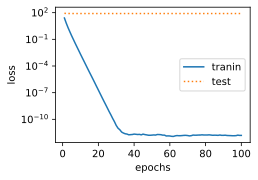

In [34]:
fit_and_plot(0)

L2 norm of w: 0.040406543761491776


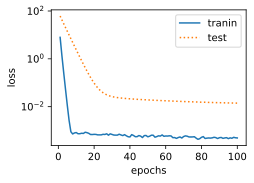

In [35]:
fit_and_plot(lambd=3)

In [43]:
def fit_and_plot_pytorch(wd):
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd)
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)
    
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            
            l.backward()
            
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 13.586226463317871


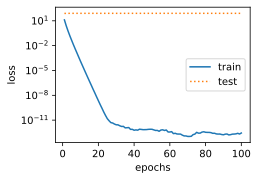

In [44]:
fit_and_plot_pytorch(0)

L2 norm of w: 0.03846731781959534


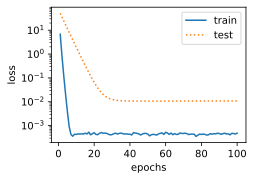

In [45]:
fit_and_plot_pytorch(3)